In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
 
sea = sns.load_dataset("seaice")
print(sea)

            Date  Extent
0     1980-01-01  14.200
1     1980-01-03  14.302
2     1980-01-05  14.414
3     1980-01-07  14.518
4     1980-01-09  14.594
...          ...     ...
13170 2019-12-27  12.721
13171 2019-12-28  12.712
13172 2019-12-29  12.780
13173 2019-12-30  12.858
13174 2019-12-31  12.889

[13175 rows x 2 columns]


In [3]:
sea ["Year"]= sea["Date"].dt.year
sea["Day"]=sea["Date"].dt.dayofyear
print(sea)

            Date  Extent  Year  Day
0     1980-01-01  14.200  1980    1
1     1980-01-03  14.302  1980    3
2     1980-01-05  14.414  1980    5
3     1980-01-07  14.518  1980    7
4     1980-01-09  14.594  1980    9
...          ...     ...   ...  ...
13170 2019-12-27  12.721  2019  361
13171 2019-12-28  12.712  2019  362
13172 2019-12-29  12.780  2019  363
13173 2019-12-30  12.858  2019  364
13174 2019-12-31  12.889  2019  365

[13175 rows x 4 columns]


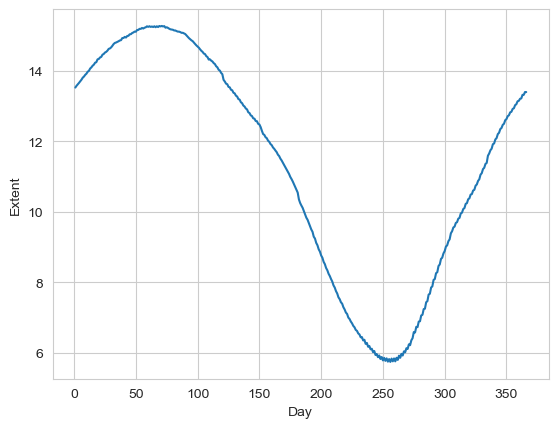

In [6]:
sns.set_style("whitegrid")
sea_1 = sea.groupby(["Day"])["Extent"].mean()
ax = sea_1.plot(kind="line",x="Day",y ="Extent",label = "mean")
plt.ylabel("Extent")
plt.show()

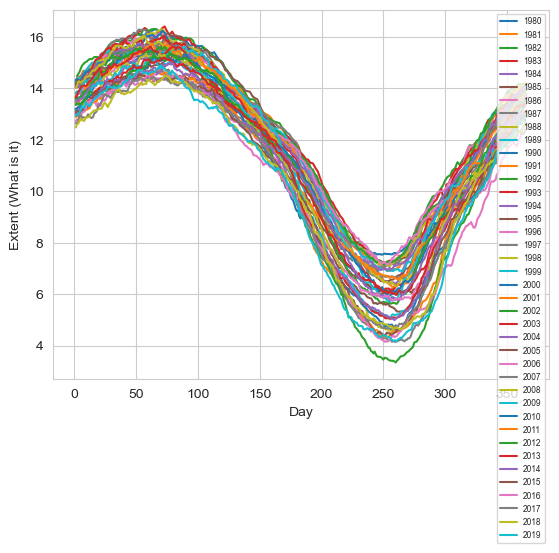

In [13]:
fig, ax = plt.subplots()
for year , sea_df in sea.groupby("Year"):
    sea_df.plot(kind="line",x="Day",y= "Extent",label = year,ax = ax)
plt.legend(fontsize=6)
plt.ylabel("Extent (What is it)")
plt.show()

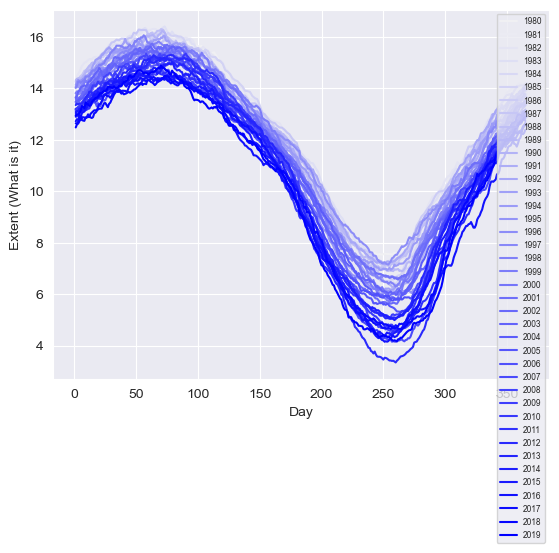

In [15]:
color_pl = dict(zip(sea["Year"].unique(), sns.color_palette("light:b",n_colors=len(sea["Year"].unique()))))
sns.set_style("darkgrid")
fig, ax = plt.subplots()
for year , sea_df in sea.groupby("Year"):
    sea_df.plot(kind="line",x="Day",y= "Extent", c = color_pl[year],label = year,ax = ax)
plt.legend(fontsize=6)
plt.ylabel("Extent (What is it)")
plt.show()

In [16]:
sea["decade"] = (sea["Year"]//10)*10
print(sea)

            Date  Extent  Year  Day  decade
0     1980-01-01  14.200  1980    1    1980
1     1980-01-03  14.302  1980    3    1980
2     1980-01-05  14.414  1980    5    1980
3     1980-01-07  14.518  1980    7    1980
4     1980-01-09  14.594  1980    9    1980
...          ...     ...   ...  ...     ...
13170 2019-12-27  12.721  2019  361    2010
13171 2019-12-28  12.712  2019  362    2010
13172 2019-12-29  12.780  2019  363    2010
13173 2019-12-30  12.858  2019  364    2010
13174 2019-12-31  12.889  2019  365    2010

[13175 rows x 5 columns]


In [18]:
sea_decade = sea.groupby(["decade","Day"])["Extent"].describe()
sea_decade.reset_index(inplace=True,names=["decade","Day"])
print(sea_decade)

      decade  Day  count     mean       std     min       25%      50%  \
0       1980    1    5.0  14.2012  0.095597  14.036  14.20000  14.2530   
1       1980    2    5.0  14.2490  0.175402  14.045  14.10300  14.3050   
2       1980    3    5.0  14.3516  0.073368  14.292  14.30200  14.3060   
3       1980    4    5.0  14.3906  0.166485  14.237  14.24000  14.4170   
4       1980    5    5.0  14.4426  0.048645  14.381  14.41400  14.4350   
...      ...  ...    ...      ...       ...     ...       ...      ...   
1459    2010  362   10.0  12.6048  0.262353  12.235  12.35750  12.6905   
1460    2010  363   10.0  12.6993  0.267680  12.223  12.49375  12.7710   
1461    2010  364   10.0  12.7466  0.260744  12.273  12.56075  12.8020   
1462    2010  365   10.0  12.7912  0.230691  12.397  12.63325  12.7805   
1463    2010  366    2.0  12.7275  0.246780  12.553  12.64025  12.7275   

           75%     max  
0     14.25600  14.261  
1     14.31300  14.479  
2     14.40200  14.456  
3     14.41

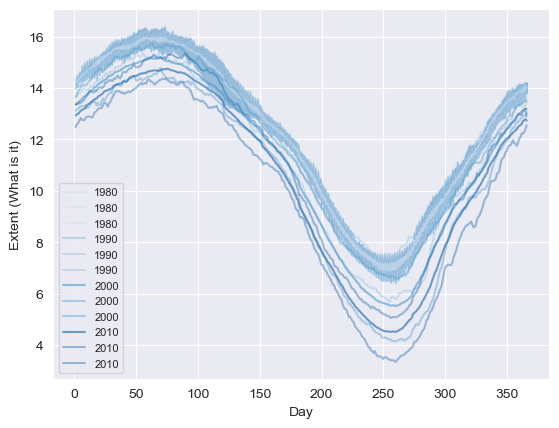

In [26]:
color_pl2 = dict(zip(sea["decade"].unique(), sns.color_palette("Blues",n_colors=len(sea["decade"].unique()))),as_cmap=True)
i=0
fig , ax = plt.subplots()
for decade , sea_df in sea_decade.groupby("decade"):
    mean = sea_df.plot(kind="line",x="Day",y= "mean", c = color_pl2[decade],label = decade,ax = ax,alpha = 0.6)
    max = sea_df.plot(kind="line",x="Day",y= "max", c = color_pl2[decade],label = decade,ax = ax,alpha = 0.4)
    min = sea_df.plot(kind="line",x="Day",y= "min", c = color_pl2[decade],label = decade,ax = ax,alpha = 0.4)
    area_line = ax.get_lines()
    min.fill_between(area_line[i].get_xdata(),area_line[i+1].get_ydata(), area_line[i+2].get_ydata(), color= color_pl2[decade],alpha = 0.2)
plt.legend(fontsize=8)
plt.ylabel("Extent (What is it)")
plt.show()


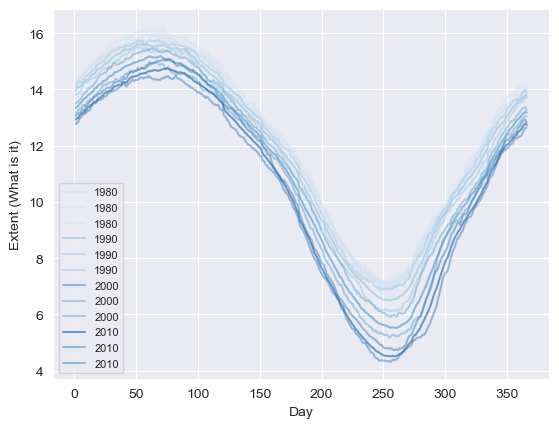

In [32]:
color_pl2 = dict(zip(sea["decade"].unique(), sns.color_palette("Blues",n_colors=len(sea["decade"].unique()))),as_cmap=True)
i=0
fig , ax = plt.subplots()
for decade , sea_df in sea_decade.groupby("decade"):
    mean = sea_df.plot(kind="line",x="Day",y= "mean", c = color_pl2[decade],label = decade,ax = ax,alpha = 0.6)
    q75 = sea_df.plot(kind="line",x="Day",y= "75%", c = color_pl2[decade],label = decade,ax = ax,alpha = 0.4)
    q25 = sea_df.plot(kind="line",x="Day",y= "25%", c = color_pl2[decade],label = decade,ax = ax,alpha = 0.4)
    area_line = ax.get_lines()
    min.fill_between(area_line[i].get_xdata(),area_line[i+1].get_ydata(), area_line[i+2].get_ydata(), color= color_pl2[decade],alpha = 0.2)
plt.legend(fontsize=8)
plt.ylabel("Extent (What is it)")
plt.show()


In [34]:
color_pl3 = dict(zip(sea["decade"].unique(), sns.color_palette("bright",n_colors=len(sea["decade"].unique()))),as_cmap=True)


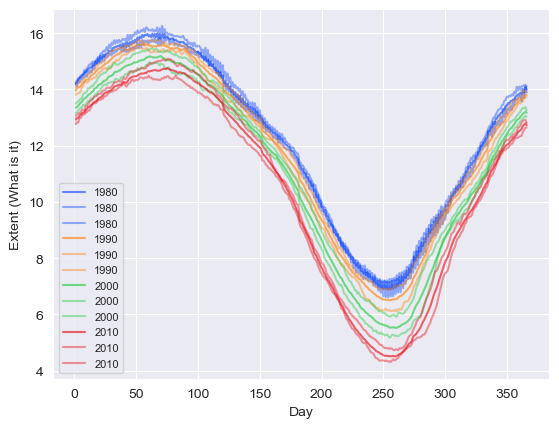

In [35]:
i=0
fig , ax = plt.subplots()
for decade , sea_df in sea_decade.groupby("decade"):
    mean = sea_df.plot(kind="line",x="Day",y= "mean", c = color_pl3[decade],label = decade,ax = ax,alpha = 0.6)
    q75 = sea_df.plot(kind="line",x="Day",y= "75%", c = color_pl3[decade],label = decade,ax = ax,alpha = 0.4)
    q25 = sea_df.plot(kind="line",x="Day",y= "25%", c = color_pl3[decade],label = decade,ax = ax,alpha = 0.4)
    area_line = ax.get_lines()
    min.fill_between(area_line[i].get_xdata(),area_line[i+1].get_ydata(), area_line[i+2].get_ydata(), color= color_pl2[decade],alpha = 0.2)
plt.legend(fontsize=8)
plt.ylabel("Extent (What is it)")
plt.show()